<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/HW9/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

---
# Завантажуємо датасет
---

In [10]:
# Завантаження датасету Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація пікселів (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
# Список назв класів
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Виведення назви класу для першого зображення
index = 0  # Індекс зображення
print(f"Мітка: {y_train[index]}, Назва класу: {class_names[y_train[index]]}")

Мітка: 9, Назва класу: Ankle boot


---
# Візуалізуємо зображення з нашого датасету:
---

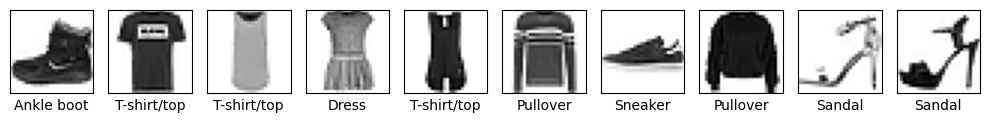

In [16]:
plt.figure(figsize=(10,10))
# Цикл для відображення перших 10 зображень
for i in range(10):
    plt.subplot(1, 10, i+1)

    # Видалення осей (ticks) для кращої візуалізації
    plt.xticks([])
    plt.yticks([])

    # Відображення зображення у градаціях сірого (чорно-білий режим)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

    # Додавання підпису з назвою класу під зображенням
    plt.xlabel(class_names[y_train[i]])

# Показ всіх створених графіків
plt.tight_layout()  # Автоматичне регулювання відступів
plt.show()

In [26]:
# Функція створення моделі
def create_model(num_layers, num_neurons, activation, optimizer, reg):
    model = Sequential([Flatten(input_shape=(28, 28))])  # Вхідний шар

    for _ in range(num_layers):  # Додаємо приховані шари
        model.add(Dense(num_neurons, activation=activation))
        if reg == 'batchnorm':
            model.add(BatchNormalization())  # Batch Normalization
        elif reg == 'dropout':
            model.add(Dropout(0.3))  # Dropout з 30% виключених нейронів

    model.add(Dense(10, activation='softmax'))  # Вихідний шар
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Колбеки
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


In [27]:
# Список експериментів
experiments = [
    {
        'num_layers': 3,
        'num_neurons': 512,
        'activation': 'relu',
        'optimizer': Adam(learning_rate=0.001),
        'reg': 'batchnorm'
    },
    {
        'num_layers': 2,
        'num_neurons': 256,
        'activation': 'tanh',
        'optimizer': SGD(learning_rate=0.01),
        'reg': 'dropout'
    }
]

# Цикл для двох експериментів
results = []
for exp in experiments:
    print(f"Навчання моделі: Layers={exp['num_layers']}, Neurons={exp['num_neurons']}, "
          f"Act={exp['activation']}, Opt={exp['optimizer']}, Reg={exp['reg']}")

    # Створення моделі
    model = create_model(exp['num_layers'], exp['num_neurons'], exp['activation'], exp['optimizer'], exp['reg'])

    # Навчання моделі
    history = model.fit(
        x_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(x_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Збереження результатів
    max_acc = max(history.history['val_accuracy'])
    results.append([exp['num_layers'], exp['num_neurons'], exp['activation'], str(exp['optimizer']), exp['reg'], max_acc])

    # Збереження даних для графіку Bias-Variance
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(train_loss) + 1)
    for epoch, t_loss, v_loss in zip(epochs_range, train_loss, val_loss):
        bias_variance_data.append([exp['num_layers'], exp['num_neurons'], exp['activation'], str(exp['optimizer']), exp['reg'], epoch, t_loss, v_loss])

# Виведення результатів
print(results_df)


Навчання моделі: Layers=3, Neurons=512, Act=relu, Opt=<keras.src.optimizers.adam.Adam object at 0x7f10ddc28d90>, Reg=batchnorm
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 139ms/step - accuracy: 0.7904 - loss: 0.6103 - val_accuracy: 0.7988 - val_loss: 0.5406 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 268s 143ms/step - accuracy: 0.8456 - loss: 0.4229 - val_accuracy: 0.8082 - val_loss: 0.5494 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 140ms/step - accuracy: 0.8622 - loss: 0.3752 - val_accuracy: 0.8470 - val_loss: 0.4259 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 317s 137ms/step - accuracy: 0.8763 - loss: 0.3362 - val_accuracy: 0.8608 - val_loss: 0.3963 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 266s 142ms/step - accuracy: 0.8815 - loss: 0.3196 - val_accuracy: 0.8613 - val_loss: 0.4000 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 317s 139ms/step - accuracy: 0.8858 - loss

### Перша модель (3 шари, 512 нейронів, активація ReLU, оптимізатор Adam, регуляризація BatchNorm):

- **Точність** зростає з **79%** на початку до **93%** на 20-й епосі.
- **Лос** після 20-ти епох зменшується з **0.61** до **0.18**.
- **Точність на валідаційних даних** поступово зростає, досягаючи **88%** на 20-й епосі.

### Друга модель (2 шари, 256 нейронів, активація tanh, оптимізатор SGD, регуляризація Dropout):

- **Точність** зростає з **66%** на початку до **86%** на 20-й епосі.
- **Лос** після 20-ти епох зменшується з **0.95** до **0.38**.
- **Точність на валідаційних даних** зростає до **85%** на 20-й епосі.

---

### Порівняння:

- **Перша модель** показує значно кращі результати щодо **точності** та **зниження лосу** порівняно з другою моделлю.
- **Архітектура першої моделі** (3 шари та 512 нейронів) є складнішою, що, ймовірно, дозволяє їй краще справлятися з класифікацією.
- **Друга модель** використовує менше нейронів та інший оптимізатор (SGD замість Adam), що обмежує її здатність досягати високих результатів.

---

### Висновок:

**Перша модель** є більш ефективною для цієї задачі.


In [ ]:
# Створення покращеної моделі
model = Sequential([
    # Вхідний шар
    Flatten(input_shape=(28, 28)),  # Перетворення 2D-даних у 1D

    # Перший прихований шар
    Dense(512, activation='relu'),  # Перший Dense шар
    BatchNormalization(),  # Нормалізація
    Dropout(0.3),  # Додавання Dropout для зменшення перенавчання

    # Другий прихований шар
    Dense(256, activation='relu'),  # Другий Dense шар
    BatchNormalization(),  # Нормалізація
    Dropout(0.3),  # Додавання Dropout

    # Третій прихований шар
    Dense(288, activation='relu'),  # Третій Dense шар

    # Вихідний шар для класифікації (10 класів)
    Dense(10, activation='softmax')  # Вихідний шар для багатокласової класифікації
])

# Компіляція моделі з оптимізатором RMSprop та додатковими налаштуваннями
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Для багатокласової класифікації
              metrics=['accuracy'])

# Огляд моделі
model.summary()

# Навчання моделі
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Збереження результатів
max_acc = max(history.history['val_accuracy'])

# Збереження даних для графіку Bias-Variance
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_loss) + 1)

# Збереження моделі
model.save(f"model_improved.keras")

results_df = pd.DataFrame([[max_acc]], columns=['Accuracy'])

# Виведення результатів
print(results_df)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 288)                 │          74,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           2,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 613,226 (2.34 MB)

 Trainable params: 611,690 (2.33 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 185s 99ms/step - accuracy: 0.7660 - loss: 0.6690 - val_accuracy: 0.8353 - val_loss: 0.4638 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 193s 103ms/step - accuracy: 0.8379 - loss: 0.4613 - val_accuracy: 0.8550 - val_loss: 0.4316 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 195s 99ms/step - accuracy: 0.8486 - loss: 0.4377 - val_accuracy: 0.8576 - val_loss: 0.3988 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 189s 101ms/step - accuracy: 0.8578 - loss: 0.4083 - val_accuracy: 0.8611 - val_loss: 0.3896 - learning_rate: 0.0010
Epoch 5/50
1714/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.8638 - loss: 0.3925